## INTRO TO VISUALIZATION ## 

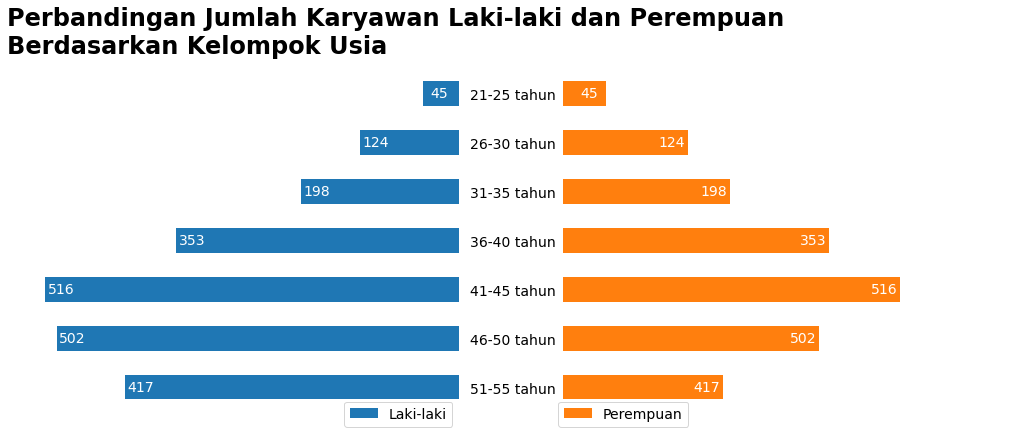

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = (pd.read_csv("https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv")
        .sort_values("Kelompok Usia", ascending=False)
        .set_index("Kelompok Usia")
        )
tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia", 
             x=0., y=1.0, fontsize=24, fontweight='bold', ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550,0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0,550])
axes[0].set_ylabel("")
axes[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0.,0.,1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False, labelbottom=False)
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0.,0.,0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]),list(tabel['Laki-laki']), list(tabel['Perempuan'])):
    axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20, i),
                     color="w", va="center", ha="center", fontsize=14)
    axes[1].annotate(str(abs(m)), (w-20, i), xytext=(w-20, i),
                     color="w", va="center", ha="center", fontsize=14)
plt.tight_layout(rect=(0,0,1,0.88))
plt.show()

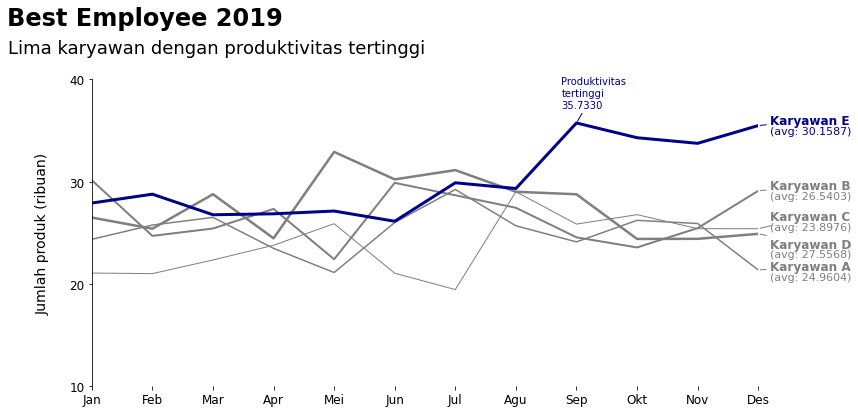

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv", index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019", x=0.01, y=0.95, fontsize=24, fontweight='bold', ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [ 1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line", ax=ax, xlim=[0, 11], ylim=[10, 40], color=colors, 
				xticks=range(tabel.shape[0]), yticks=[10, 20, 30, 40])

add_lbl_pos = [ 0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
	item.set_linewidth(line_widths[i])
	lbl = item.get_label()
	ax.annotate(lbl, (11, tabel.loc["Desember", lbl]),
				(11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
				fontweight="bold", fontsize=12, color=colors[i], va="center", 
				arrowprops={"arrowstyle": "-", "color": colors[i]})
	ax.annotate("(avg: %.4f)" % tabel[lbl].mean(), (11, tabel.loc["Desember", lbl]),
				(11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]),
				fontsize=11, color=colors[i], va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod,
			(8, highest_prod), (7.75, highest_prod+1.5),
			ha="left", color=colors[-1], arrowprops={"arrowstyle": "-", "color": colors[-1]})
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.tight_layout(rect=(0,0,1,0.90))
plt.show()

# VISUALIZATION - PART 1

In [5]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


In [6]:
# Membuat kolom order_month
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


In [7]:
# Penambahan Kolom GMV pada Dataset
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


In [8]:
#Membuat Data Agregat
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


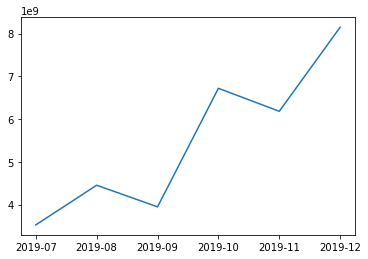

In [9]:
#Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV
import matplotlib.pyplot as plt
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

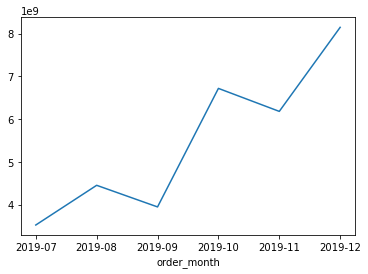

In [10]:
# Cara Alternatif: Fungsi .plot() pada pandas Dataframe
import matplotlib.pyplot as plt
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

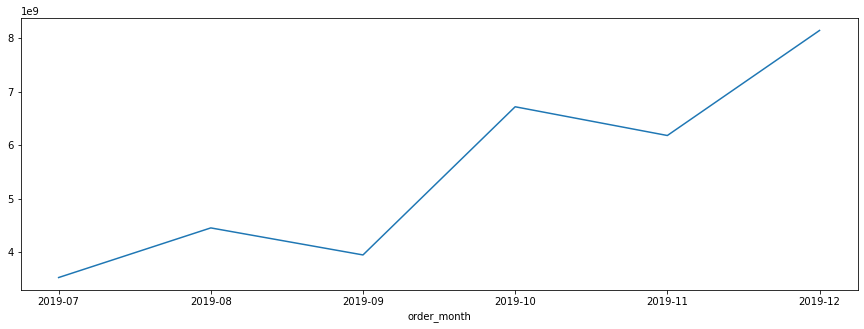

In [11]:
# Mengubah Figure Size
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

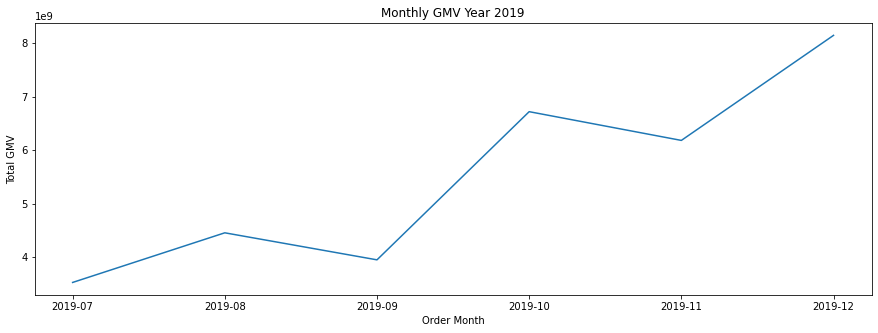

In [12]:
# Menambahkan Title and Axis Labels
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

### Kustomisasi Title and Axis Labels
Misalnya, untuk judul/title, parameter yang bisa ditambahkan:
1. loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
2. pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
3. fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
4. color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

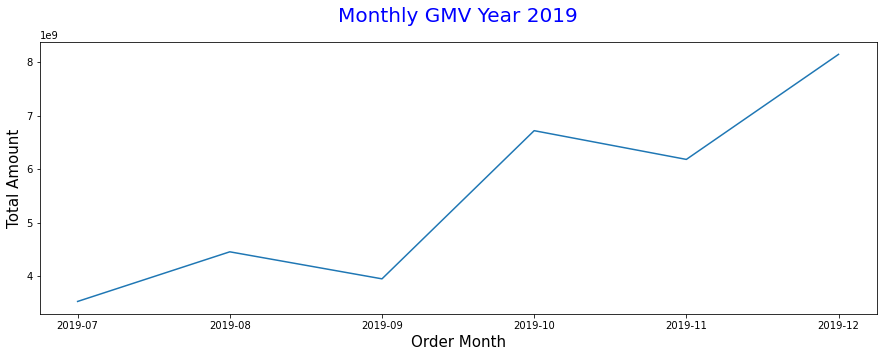

In [14]:
# Kustomisasi Title and Axis Labels
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

### Kustomisasi Line dan Point
Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:
* color: mengubah warnanya (sama seperti di title)
* linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
* linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
* marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

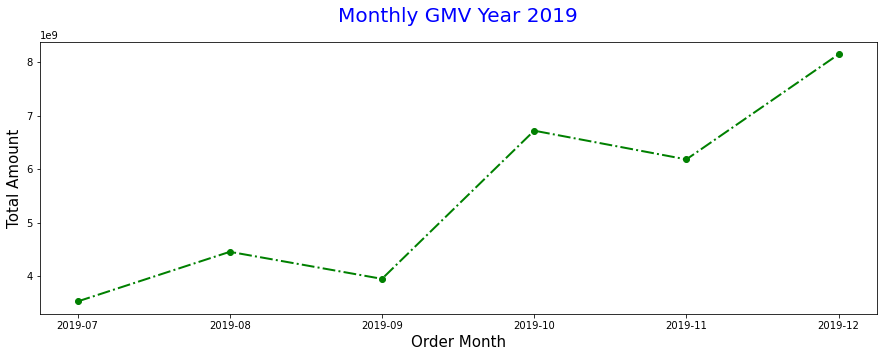

In [15]:
# Kustomisasi Line dan Point
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

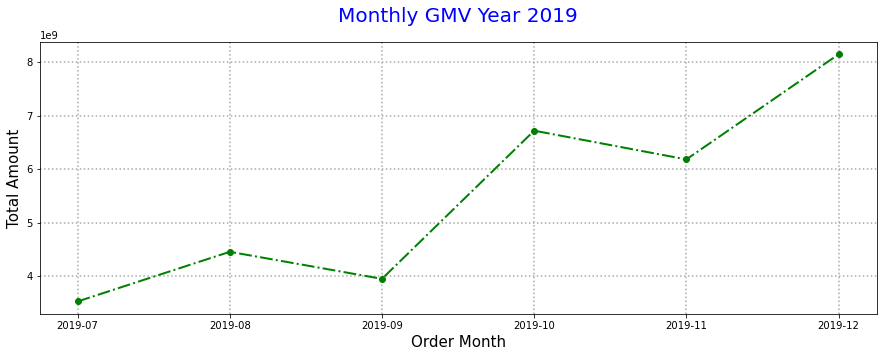

In [17]:
# Kustomisasi Grid
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)
plt.show()

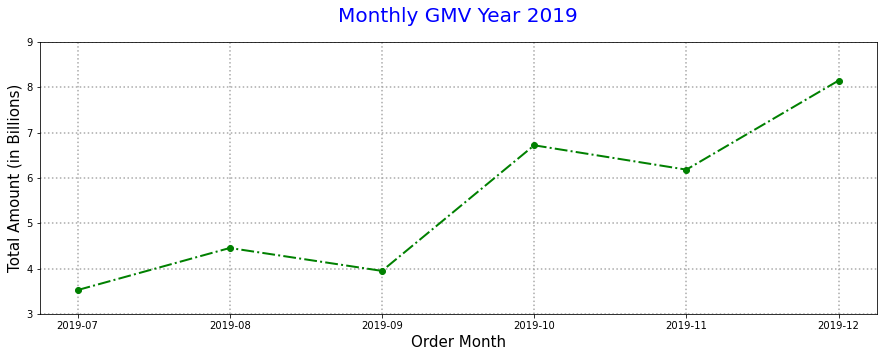

In [19]:
# Kustomisasi Axis Ticks
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

* Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan plt.ylim(ymin=0) seperti ini:

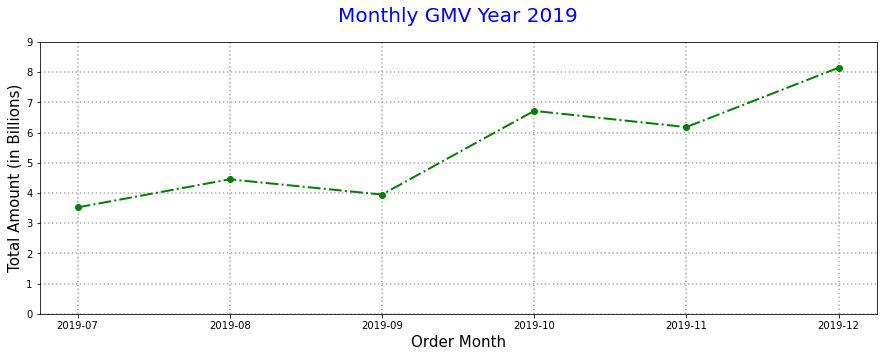

In [20]:
# Menentukan Batas Minimum dan Maksimum Axis Ticks
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

“Berhubung grafiknya sudah jadi, Aksara. Ada baiknya kita menambahkan beberapa informasi di dalamnya agar pembaca mendapatkan insight dari grafik tersebut. Menurutmu?”

“Boleh juga. Bagusnya kita tambahkan insight apa ya?”

“Dilihat dari trend-nya, mulai bulan Oktober 2019, GMV kita naik drastis setelah sebelumnya stagnan di angka 200-300 milyar per bulan. Kita bisa mulai dengan menambahkan info ini di grafik. Caranya seperti ini,” jelas Senja.

Caranya dengan menambahkan plt.text seperti potongan kode program berikut ini:

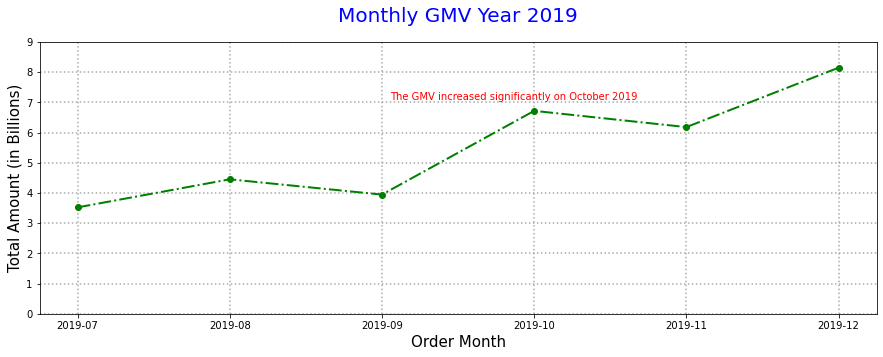

In [22]:
# Menambahkan Informasi Pada Plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

### Pengaturan Parameter untuk Menyimpan Gambar
Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

* dpi: Resolusi gambar (dots per inch). 
* quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
* facecolor: Memberikan warna bagian depan figure, di luar area plot 
* edgecolor: Memberikan warna pinggiran gambar
* transparent: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

### Studi Kasus dari Senja: Daily number of customers on Desember 
Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:
* Ukuran figure adalah 10x5
* Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
* Sumbu-y adalah jumlah unique customers di tiap tanggal
* Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

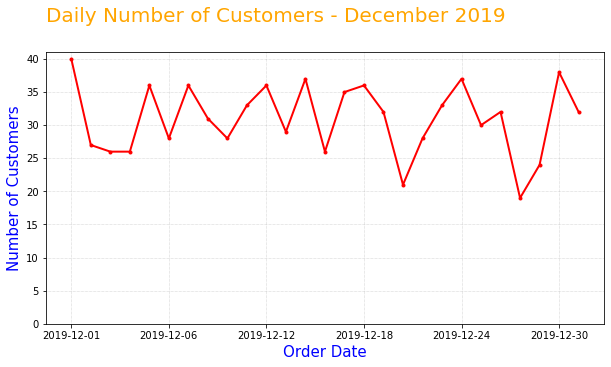

In [24]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

# VISUALIZATION - PART 2

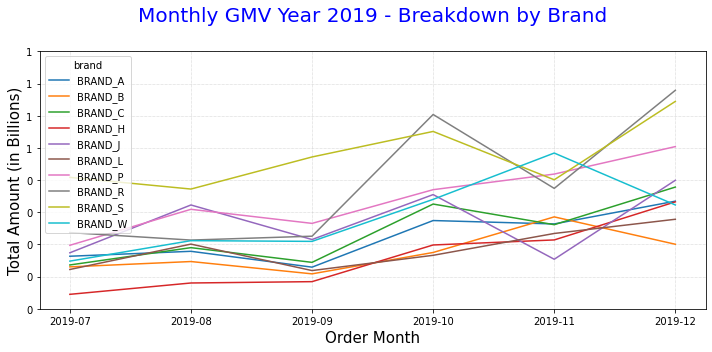

In [25]:
# Membuat Multi-Line Chart
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center' ,pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations =  plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Kustomisasi Legend
Atur komponen legend menggunakan function **plt.legend()** seperti yang ditunjukkan oleh potongan kode berikut ini:
> plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)

Beberapa parameter yang bisa ditambahkan untuk legend:
* loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
* 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
* 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
* 'center': legend diletakkan di tengah-tengah axes
* 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
* bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
* shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
* ncol: jumlah kolom dari isi legend, defaultnya adalah 1
* fontsize: ukuran huruf pada legend
* title: memberikan judul pada legend
* title_fontsize: ukuran huruf pada judul legend

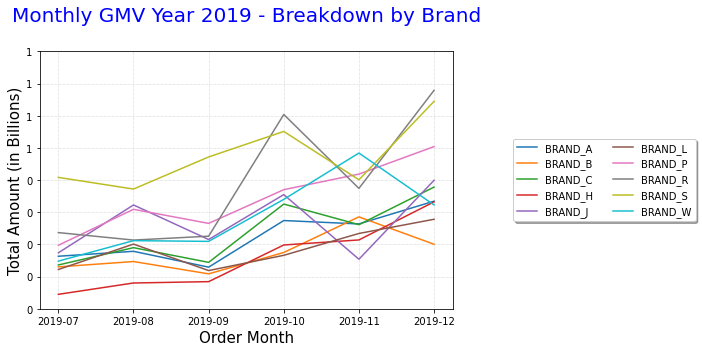

In [26]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Kustomisasi Colormap

<Figure size 432x288 with 0 Axes>

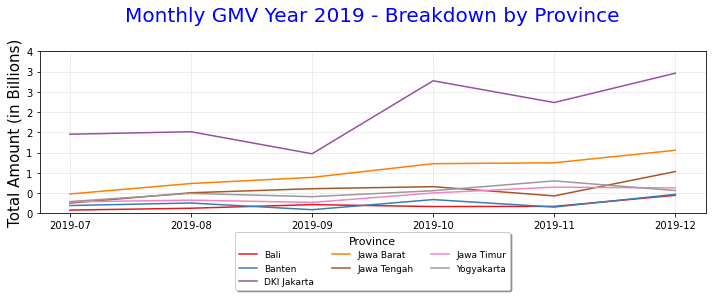

In [27]:
# Kustomisasi Colormap
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True,ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

### Membuat Line Chart GMV Breakdown by Top Provinces

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


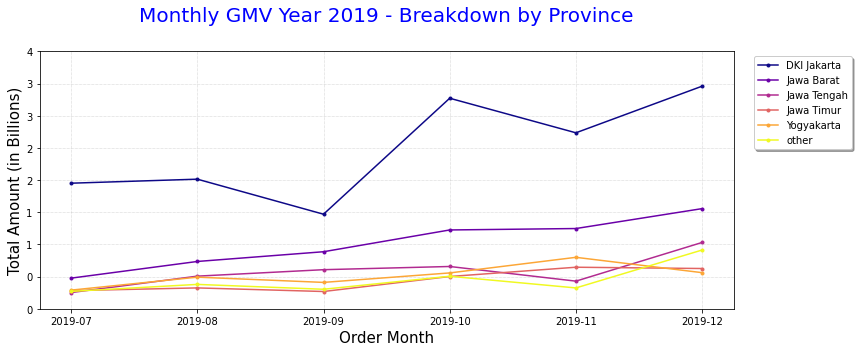

In [28]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30,fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True,ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Membuat Anotasi
Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

* xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
* arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
* arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
*  connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
* color: menentukan warna dari panah

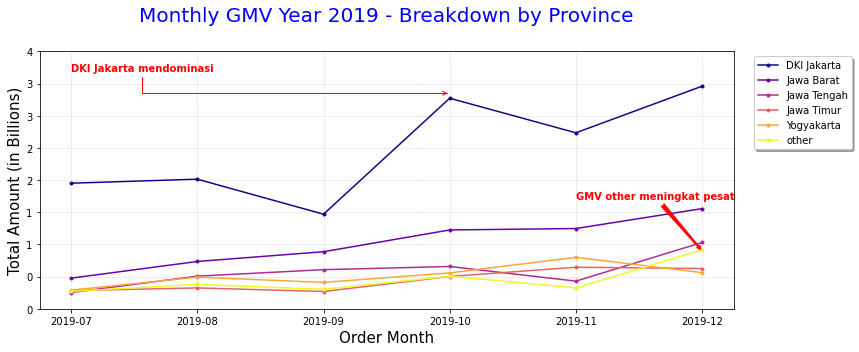

In [29]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			 xytext=(4, 1700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='fancy',
							 connectionstyle="arc3",
							 color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			 xytext=(0, 3700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='->',
							 connectionstyle="angle",
							 color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Membuat Subset Data
“Sudah aku sampaikan ke kepala cabang. Ini insight yang menarik menurut beliau. Ada rikues kalau provinsi ‘other’ ini, kita analisis lagi di lain waktu saja dan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019 ini, karena trend-nya mirip dengan overall GMV. Kita fokuskan ke sana ya,” pinta Senja.

“Oke, aku coba cek dulu perbandingan GMV di kota-kota di DKI Jakarta itu seperti apa,” sahutku segera beraksi.

“Iya, berhubung kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru", tukas Senja sembari membantu mengarahkan kursorku untuk memberikan contoh menggunakan data frame **dataset_dki_q4**.

In [30]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >='2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


### Membuat Pie Chart
Beberapa parameter yang bisa dimodifikasi:
* labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
* colors: array yang berisikan warna untuk masing-masing bagian pie.
* autopct: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
* shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
* radius: jari-jari dari pie-chart

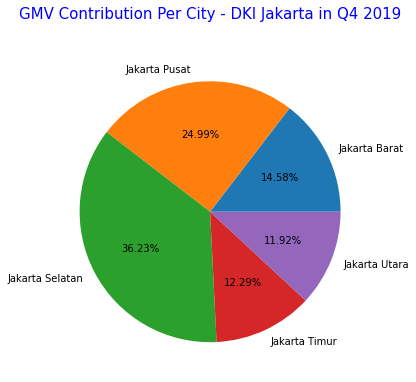

In [34]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15, color='blue')
plt.show()

### Membuat Bar Chart

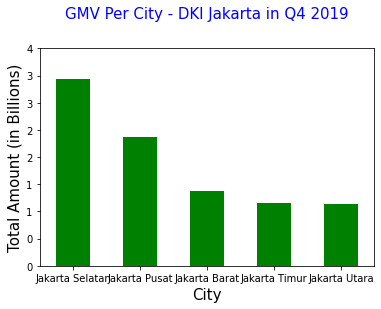

In [37]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

### Membuat Multi-Bar Chart

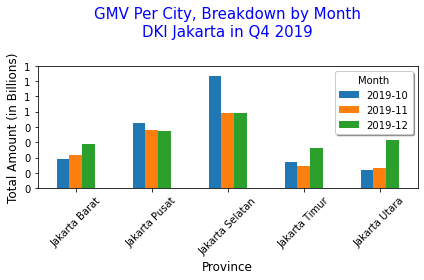

In [38]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Membuat Stacked Chart

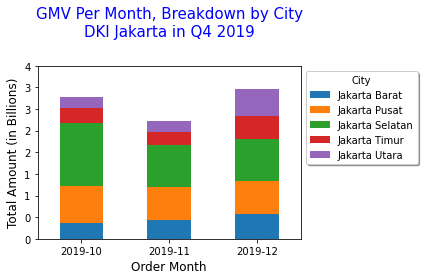

In [42]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Membuat Agregat Data Customer
“Oke, data ini sudah bisa jadi dasar bagi kami untuk membuat kampanye yang meningkatkan transaksi. Kalau dilihat, ini di Jakarta Barat potensinya lagi baik ya. Tiap bulan growth-nya positif,” ujar seorang bapak dari video call di ponsel Senja.

Dari Senja, kuketahui kalau beliau adalah kepala cabang A yang menerima hasil dataku kemarin.

“Bagaimana dengan customer kita di DKI Jakarta? Apakah ada pola-pola menarik, terutama di Q4 2019?” tanya beliau kembali.

“Untuk itu, coba kita lihat dulu summary untuk tiap customer kita ya, Pak,” sahut Senja sembari memberi intruksi padaku.

Aku pun membuat dataframe baru bernama **data_per_customer_dki_q4**.

In [43]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                    .agg({'order_id':'nunique',
                                         'quantity':'sum',
                                        'gmv':'sum'})
                                    .reset_index()
                                    .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


Di sini menggunakan function agg untuk melakukan agregasi data. Data agregat per customer yang diambil yaitu jumlah orders (banyaknya unique order_id), total quantity, dan total GMV.

Lalu didapatkan 711 customers yang bertransaksi di DKI Jakarta pada Q4 2020.

Jika diurutkan dari jumlah order terbanyak, bisa dilihat bahwa customer_id 12748 telah melakukan 29 transaksi dengan jumlah quantity mencapai 557, dan GMV lebih dari 175 Juta! Luar biasa ya. Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk.

### Membuat Histogram - Part 1
Parameter lain yang bisa ditambahkan yaitu:
* bins: jumlah bin (kelompok nilai) yang diinginkan
* range: nilai minimum dan maksimum yang ditampilkan
* orientation: ‘horizontal’ atau ‘vertikal’
* color: warna bar di histogram

<Figure size 432x288 with 0 Axes>

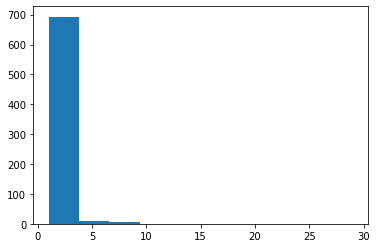

In [44]:
import matplotlib.pyplot as plt
plt.clf()
#Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()

Terlihat bahwa datanya terlalu berat ke kiri, hampir semua customer hanya bertransaksi kurang dari 10, maka dari itu perlu set range-nya, misalnya hanya dari 1 sampai 5.

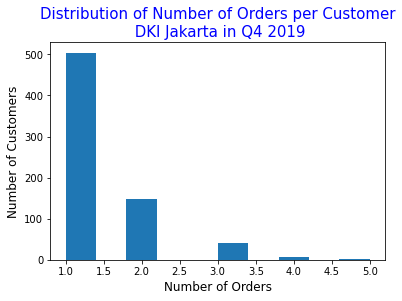

In [45]:
# Histogram Kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\n DKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

### Membuat Histogram - Part 2
Membuat histogram untuk quantity

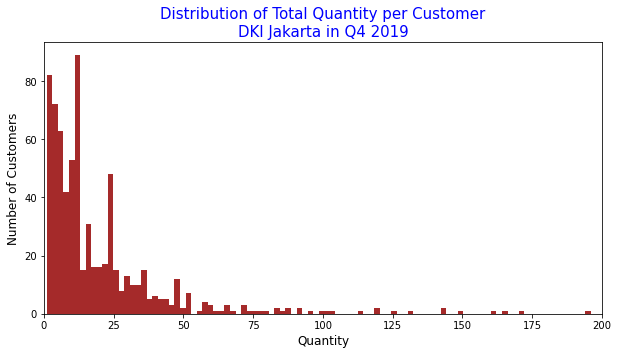

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

### Membuat Histogram - Part 3
“Aksara, kalau untuk GMV, agak berbeda. Kamu paham maksud saya?” ujar Senja mengingatkan.

Aku mengangguk. Aku harus menormalisasi ticks label di sumbu-x karena angka yang menunjukkan GMV bisa jadi terlalu panjang. Aku menunjukkanya pada Senja:

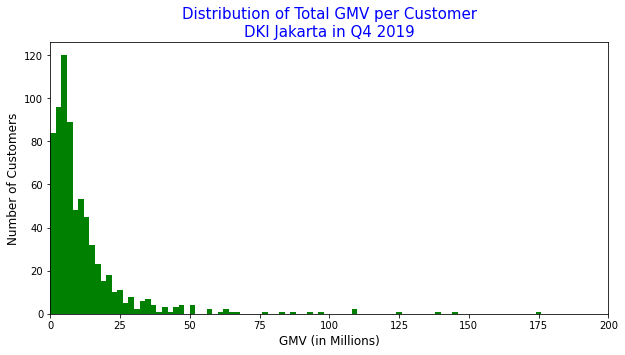

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

### Membuat Scatter Plot
“Aksara, ini udah bagus penyajiannya. Tapi apakah variabel tersebut bisa saling berkorelasi?” tanya Senja menyadarkanku. Aku pun segera melihatnya dengan scatterplot.

Untuk membuat scatterplot, aku perlu menggunakan function plt.scatter dengan memasukkan variabel-variabel yang akan dibuat scatterplot.

Contoh untuk melihat scatterplot quantity vs GMV:

<Figure size 432x288 with 0 Axes>

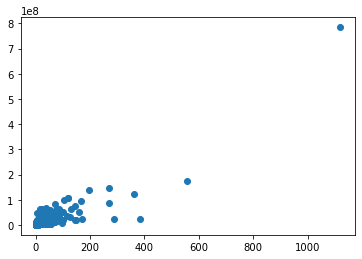

In [48]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ.

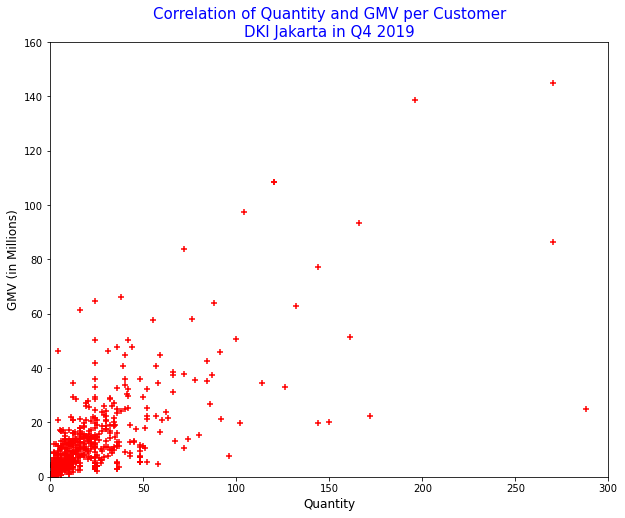

In [50]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)', fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

## Chapter 5
### Pendahuluan
Aku telah selesai belajar bersama Senja mempelajari bagaimana membuat berbagai jenis visualisasi dengan matplotlib, diantaranya:
1. membuat multi line-chart yang dapat digunakan untuk melihat komparasi dari GMV dari berbagai provinsi, dari bulan ke bulan.
2. menghasilkan pie chart atau multi bar-chart untuk melihat komposisi GMV per kota.
3. untuk melihat distribusi GMV atau quantity, kita bisa gunakan histogram.
4. membuat scatterplot yang bisa memperlihatkan relasi antara quantity dan GMV.

Oleh karena itu, saat aku ingin membuat suatu visualisasi dari data yang dimiliki, aku bisa memilih mana jenis yang paling tepat, serta sudah bisa membuatnya dengan matplotlib.

### Case 1: Menentukan brand top 5

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

**Case 1:** <br>
Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [51]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


### Case 2: Multi-line chart daily quantity untuk brand top 5 
**Case 2:**<br>
Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.

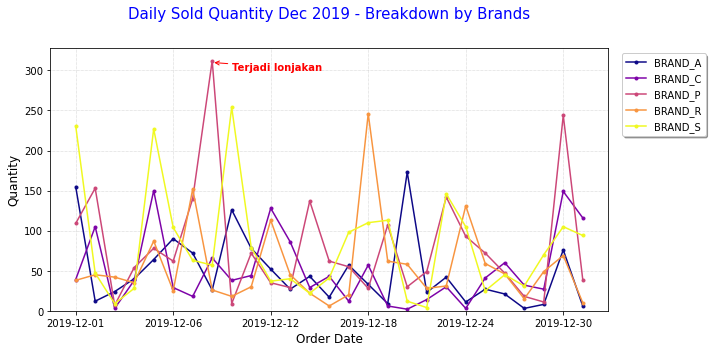

In [52]:
import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Case 3: Kuantitas penjualan brand top 5 selama Desember 2019
**Case 3:**<br>
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

Jika berhasil dijalankan akan menghasilkan grafik seperti berikut ini:

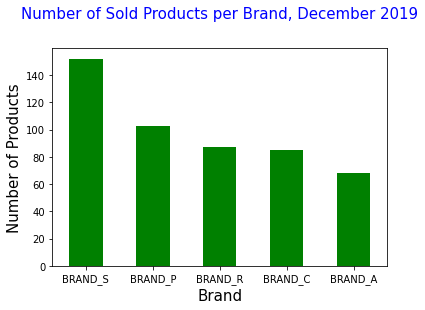

In [53]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

### Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019
Case 4:<br>
Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?

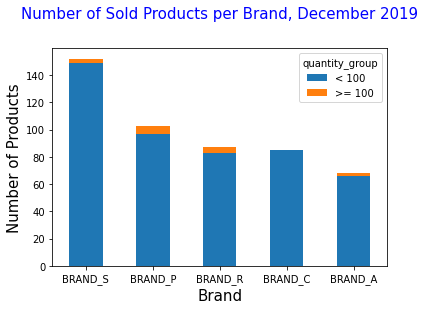

In [54]:
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

### Case 5: Murah atau mahalkah harga produk brand top 5
Case 5:<br>
Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

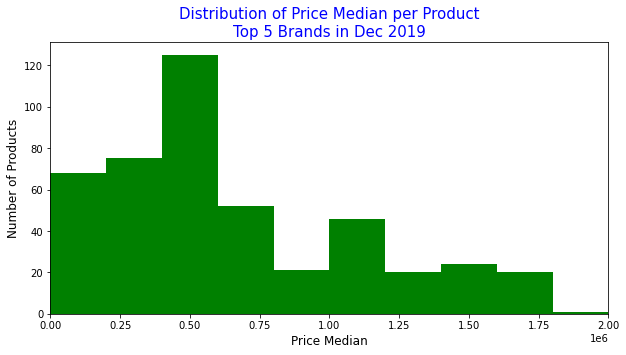

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

### Case 6a: Korelasi quantity vs GMV
Case 6a:<br>
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

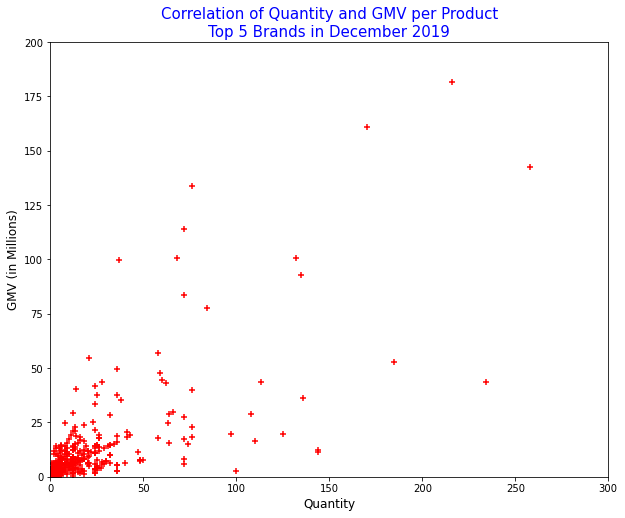

In [56]:
import matplotlib.pyplot as plt
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

### Case 6b: Korelasi median harga vs quantity
Case 6b:<br>
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

<Figure size 432x288 with 0 Axes>

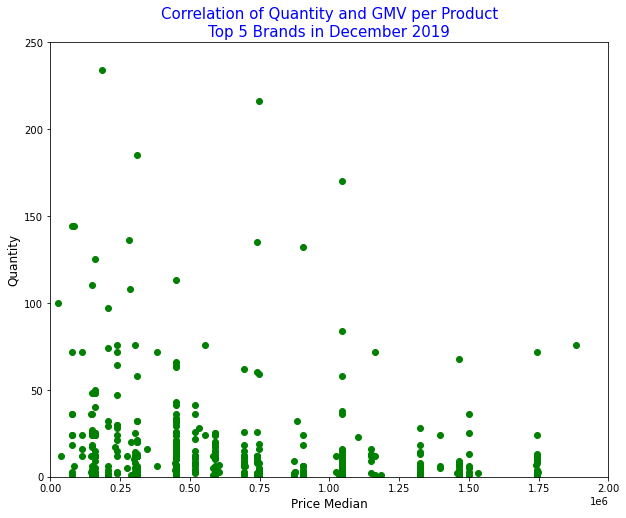

In [57]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()